In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Данные дата сет взят с https://www.kaggle.com/nathanlauga/nba-games из него я взял games.csv. Целью данного анализа ставлю найти закономерности между показателями игры. Есть ли какая-то корреляция между показателями команды на их результативность и как. Принятые сокращения: home(H) - признак команды играющей дома( имеющей преимущество своего площадки); Away(A) - команда на выезде; PTS - набранные очки; FG_PCT - %реализации(2оч +3оч) с игры, т.е. все кроме штрафных; FG3_PCT - %реализации(3оч); AST - передачи, REB - подборы в защите и нападении

ID игры: 1число - тип игр (1 предсезонка, 2 сезон, 3 игра all-star, 4 плейофф) 2числа - год, далее порядковый номер игры

## Подготовка данных, удаление лишнего и добавление необходимого

In [90]:
df_all = pd.read_csv('files/games.csv')

In [91]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24677 entries, 0 to 24676
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     24677 non-null  object 
 1   GAME_ID           24677 non-null  int64  
 2   GAME_STATUS_TEXT  24677 non-null  object 
 3   HOME_TEAM_ID      24677 non-null  int64  
 4   VISITOR_TEAM_ID   24677 non-null  int64  
 5   SEASON            24677 non-null  int64  
 6   TEAM_ID_home      24677 non-null  int64  
 7   PTS_home          24578 non-null  float64
 8   FG_PCT_home       24578 non-null  float64
 9   FT_PCT_home       24578 non-null  float64
 10  FG3_PCT_home      24578 non-null  float64
 11  AST_home          24578 non-null  float64
 12  REB_home          24578 non-null  float64
 13  TEAM_ID_away      24677 non-null  int64  
 14  PTS_away          24578 non-null  float64
 15  FG_PCT_away       24578 non-null  float64
 16  FT_PCT_away       24578 non-null  float6

в датасете есть продублированные столбцы, убирем лишние HOME_TEAM_ID VISITOR_TEAM_ID GAME_STATUS_TEXT

In [92]:
df_all.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,...,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,1610612752,101.0,0.383,0.739,...,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,1610612762,141.0,0.544,0.774,...,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,1610612751,130.0,0.523,0.955,...,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,1610612756,102.0,0.465,0.933,...,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0


In [93]:
# скорее всего этот столбец содержит лишь одно значение, проверим и удалим
df_all['GAME_STATUS_TEXT'].unique()

array(['Final'], dtype=object)

In [94]:
# Склонирую df чтобы при написании кода, каждый раз не считывать файл
df = df_all.copy()
# Удалю дублирующую информацию
df.drop(['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'GAME_STATUS_TEXT'], axis=1, inplace=True)

In [95]:
# в сводке выше видно что датафреме содержит не все данные, посморим на них и если удалим
df.loc[df['PTS_home'].isna()]

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
17201,2003-10-24,10300116,2003,1610612753,NaN,NaN,NaN,NaN,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
17202,2003-10-24,10300108,2003,1610612737,NaN,NaN,NaN,NaN,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
17203,2003-10-24,10300109,2003,1610612738,NaN,NaN,NaN,NaN,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
17204,2003-10-24,10300113,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
17205,2003-10-24,10300112,2003,1610612749,NaN,NaN,NaN,NaN,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,2003-10-09,10300019,2003,1610612743,NaN,NaN,NaN,NaN,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
17296,2003-10-09,10300022,2003,1610612757,NaN,NaN,NaN,NaN,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
17297,2003-10-08,10300013,2003,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
17304,2003-10-08,10300015,2003,1610612747,NaN,NaN,NaN,NaN,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [96]:
df = df.dropna(thresh=13)

In [97]:
# Немного укорочу названия столбцов
df = df.rename(columns={'GAME_DATE_EST':'Date', 'SEASON':'seas', 'TEAM_ID_home':'Team_H', 'PTS_home':'PTS_H', 'FG_PCT_home':'FG%_H', 'FT_PCT_home':'FT%_H', 'FG3_PCT_home':'FG3%_H', 'AST_home':'AST_H', 'REB_home':'REB_H', 'TEAM_ID_away':'Team_A', 'PTS_away':'PTS_A', 'FG_PCT_away':'FG%_A', 'FT_PCT_away':'FT%_A', 'FG3_PCT_away':'FG3%_A', 'AST_away':'AST_A', 'REB_away':'REB_A', 'HOME_TEAM_WINS':'team_H_win'})
df

,Date,GAME_ID,seas,Team_H,PTS_H,FG%_H,FT%_H,FG3%_H,AST_H,REB_H,Team_A,PTS_A,FG%_A,FT%_A,FG3%_A,AST_A,REB_A,team_H_win
0,2021-05-26,42000102,2020,1610612755,120.0,0.557,0.684,0.429,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,2020,1610612752,101.0,0.383,0.739,0.364,15.0,54.0,1610612737,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,2020,1610612762,141.0,0.544,0.774,0.487,28.0,42.0,1610612763,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,2020,1610612751,130.0,0.523,0.955,0.447,31.0,46.0,1610612738,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,2020,1610612756,102.0,0.465,0.933,0.308,21.0,31.0,1610612747,109.0,0.450,0.871,0.303,24.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24672,2014-10-06,11400007,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
24673,2014-10-06,11400004,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
24674,2014-10-06,11400005,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
24675,2014-10-05,11400002,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [98]:
df['Date'] = pd.to_datetime(df['Date'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24578 entries, 0 to 24676
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        24578 non-null  datetime64[ns]
 1   GAME_ID     24578 non-null  int64         
 2   seas        24578 non-null  int64         
 3   Team_H      24578 non-null  int64         
 4   PTS_H       24578 non-null  float64       
 5   FG%_H       24578 non-null  float64       
 6   FT%_H       24578 non-null  float64       
 7   FG3%_H      24578 non-null  float64       
 8   AST_H       24578 non-null  float64       
 9   REB_H       24578 non-null  float64       
 10  Team_A      24578 non-null  int64         
 11  PTS_A       24578 non-null  float64       
 12  FG%_A       24578 non-null  float64       
 13  FT%_A       24578 non-null  float64       
 14  FG3%_A      24578 non-null  float64       
 15  AST_A       24578 non-null  float64       
 16  REB_A       24578 non-

In [100]:
#Преобразование pd.Datetime для matplotlib, но преобразовывать буду только при передаче на график
#df.Date = matplotlib.dates.date2num(df['Date'])
#datestr2num

In [101]:
# Преобразую ID команду в абревеатуры, для удобства чтения и будущего анализа
df_team = pd.read_csv('files/teams.csv')
df['team_H'] = df.apply(lambda row : df_team.loc[df_team['TEAM_ID'] == row.Team_H, 'ABBREVIATION'].values[0], axis=1)
df['team_A'] = df.apply(lambda row : df_team.loc[df_team['TEAM_ID'] == row.Team_A, 'ABBREVIATION'].values[0], axis=1)

In [102]:
# Создам еще один столбец с разницой очков в игре
df.loc[:, 'dif_score'] = df.PTS_H - df.PTS_A

In [103]:
# удалю ID команды и признак победы, который теперь определяется знаком df.dif_score и немножко переставлю столбцы местами
df.drop(['Team_H', 'Team_A', 'team_H_win'], axis=1, inplace=True)
df = df[['GAME_ID', 'seas', 'Date', 'team_H', 'team_A', 'PTS_H', 'PTS_A', 'dif_score', 'AST_H', 'AST_A', 'REB_H', 'REB_A', 'FG%_H', 'FG%_A', 'FG3%_H', 'FG3%_A', 'FT%_H', 'FT%_A']]
df

,GAME_ID,seas,Date,team_H,team_A,PTS_H,PTS_A,dif_score,AST_H,AST_A,REB_H,REB_A,FG%_H,FG%_A,FG3%_H,FG3%_A,FT%_H,FT%_A
0,42000102,2020,2021-05-26,PHI,WAS,120.0,95.0,25.0,26.0,22.0,45.0,40.0,0.557,0.402,0.429,0.091,0.684,0.633
1,42000132,2020,2021-05-26,NYK,ATL,101.0,92.0,9.0,15.0,17.0,54.0,41.0,0.383,0.369,0.364,0.273,0.739,0.818
2,42000142,2020,2021-05-26,UTA,MEM,141.0,129.0,12.0,28.0,20.0,42.0,33.0,0.544,0.541,0.487,0.348,0.774,0.763
3,42000112,2020,2021-05-25,BKN,BOS,130.0,108.0,22.0,31.0,23.0,46.0,43.0,0.523,0.424,0.447,0.353,0.955,0.783
4,42000152,2020,2021-05-25,PHX,LAL,102.0,109.0,-7.0,21.0,24.0,31.0,39.0,0.465,0.450,0.308,0.303,0.933,0.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24672,11400007,2014,2014-10-06,ATL,NOP,93.0,87.0,6.0,24.0,17.0,50.0,43.0,0.419,0.366,0.421,0.375,0.821,0.643
24673,11400004,2014,2014-10-06,CHI,WAS,81.0,85.0,-4.0,18.0,17.0,40.0,47.0,0.338,0.411,0.381,0.267,0.719,0.636
24674,11400005,2014,2014-10-06,LAL,DEN,98.0,95.0,3.0,29.0,19.0,45.0,43.0,0.448,0.387,0.500,0.500,0.682,0.659
24675,11400002,2014,2014-10-05,TOR,SAC,99.0,94.0,5.0,21.0,18.0,30.0,45.0,0.440,0.469,0.333,0.385,0.771,0.725


Для коректного сравнения стоит df разделить на 4 группы: предсезонные игры, сезон, игра всех звезд, плейофф и сравнивать либо друг сдругом, либо внутри группы но не все вместе ( забегая вперед игр всех звезд в этом df не оказалось)

In [104]:
df_preseason = df.loc[df['GAME_ID'].between(10000000, 20000000)]
df_regul = df.loc[df['GAME_ID'].between(20000000, 30000000)]
df_playoff = df.loc[df['GAME_ID'].between(40000000, 50000000)]

In [105]:
df_preseason.describe()

,GAME_ID,seas,PTS_H,PTS_A,dif_score,AST_H,AST_A,REB_H,REB_A,FG%_H,FG%_A,FG3%_H,FG3%_A,FT%_H,FT%_A
count,1.544000e+03,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,1.115841e+07,2011.583549,99.803109,97.842617,1.960492,21.743523,20.600389,43.409326,42.620466,0.443410,0.433703,0.341424,0.335881,0.733750,0.732742
std,4.705767e+05,4.705812,12.849902,13.347802,13.821063,4.746895,4.942602,6.869080,6.725696,0.058034,0.057511,0.114833,0.118105,0.100029,0.099018
min,1.030000e+07,2003.000000,36.000000,33.000000,-51.000000,8.000000,5.000000,15.000000,19.000000,0.277000,0.259000,0.000000,0.000000,0.318000,0.350000
25%,1.080001e+07,2008.000000,91.000000,89.000000,-7.000000,18.000000,17.000000,39.000000,38.000000,0.404000,0.393000,0.267000,0.260750,0.667000,0.676000
50%,1.120004e+07,2012.000000,99.000000,97.000000,3.000000,22.000000,20.000000,43.000000,42.000000,0.442000,0.432000,0.333000,0.333000,0.739000,0.735000
75%,1.150010e+07,2015.000000,108.000000,106.000000,11.000000,25.000000,24.000000,48.000000,47.000000,0.482250,0.471000,0.417000,0.412000,0.800000,0.800000
max,1.200005e+07,2020.000000,143.000000,144.000000,54.000000,39.000000,40.000000,67.000000,65.000000,0.648000,0.657000,0.833000,1.000000,1.000000,1.000000


In [106]:
df_regul.describe()

,GAME_ID,seas,PTS_H,PTS_A,dif_score,AST_H,AST_A,REB_H,REB_A,FG%_H,FG%_A,FG3%_H,FG3%_A,FT%_H,FT%_A
count,2.159200e+04,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,2.114309e+07,2011.424880,103.093924,100.281586,2.812338,22.828084,21.477353,43.299000,41.991988,0.461822,0.450744,0.357919,0.351158,0.760924,0.759201
std,5.166327e+05,5.166435,13.083040,13.184349,13.336153,5.177977,5.127059,6.592886,6.500249,0.056326,0.055193,0.112892,0.111131,0.100340,0.103274
min,2.030000e+07,2003.000000,59.000000,54.000000,-57.000000,6.000000,4.000000,17.000000,20.000000,0.250000,0.244000,0.000000,0.000000,0.143000,0.143000
25%,2.070052e+07,2007.000000,94.000000,91.000000,-7.000000,19.000000,18.000000,39.000000,38.000000,0.423000,0.414000,0.286000,0.278000,0.700000,0.692000
50%,2.120001e+07,2012.000000,103.000000,100.000000,4.000000,23.000000,21.000000,43.000000,42.000000,0.461000,0.450000,0.357000,0.350000,0.767000,0.765000
75%,2.160049e+07,2016.000000,112.000000,109.000000,11.000000,26.000000,25.000000,48.000000,46.000000,0.500000,0.488000,0.429000,0.421000,0.833000,0.833000
max,2.200108e+07,2020.000000,168.000000,168.000000,61.000000,50.000000,46.000000,72.000000,81.000000,0.684000,0.674000,1.000000,1.000000,1.000000,1.000000


In [107]:
df_playoff.describe()

,GAME_ID,seas,PTS_H,PTS_A,dif_score,AST_H,AST_A,REB_H,REB_A,FG%_H,FG%_A,FG3%_H,FG3%_A,FT%_H,FT%_A
count,1.435000e+03,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,4.110731e+07,2011.071080,100.942857,96.455749,4.487108,20.927526,19.315679,42.700348,40.967944,0.454780,0.439708,0.344141,0.338118,0.758601,0.756226
std,4.953373e+05,4.953392,13.220301,13.384923,13.604303,5.041561,4.817593,6.537370,6.274438,0.057661,0.055458,0.113412,0.104799,0.100319,0.104994
min,4.030010e+07,2003.000000,63.000000,56.000000,-58.000000,7.000000,7.000000,23.000000,22.000000,0.257000,0.244000,0.000000,0.000000,0.286000,0.300000
25%,4.070014e+07,2007.000000,92.000000,87.000000,-5.000000,17.000000,16.000000,38.000000,37.000000,0.417000,0.403000,0.273000,0.267000,0.696000,0.694000
50%,4.110021e+07,2011.000000,100.000000,96.000000,5.000000,21.000000,19.000000,42.000000,41.000000,0.452000,0.438000,0.345000,0.333000,0.765000,0.760000
75%,4.150030e+07,2015.000000,109.500000,105.000000,13.000000,24.000000,22.000000,47.000000,45.000000,0.494000,0.474000,0.417000,0.409000,0.828000,0.824000
max,4.200017e+07,2020.000000,154.000000,150.000000,43.000000,39.000000,39.000000,65.000000,68.000000,0.631000,0.646000,0.786000,0.727000,1.000000,1.000000


## Анализ данных с помощию визуализации

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение очков на домашней площадке')

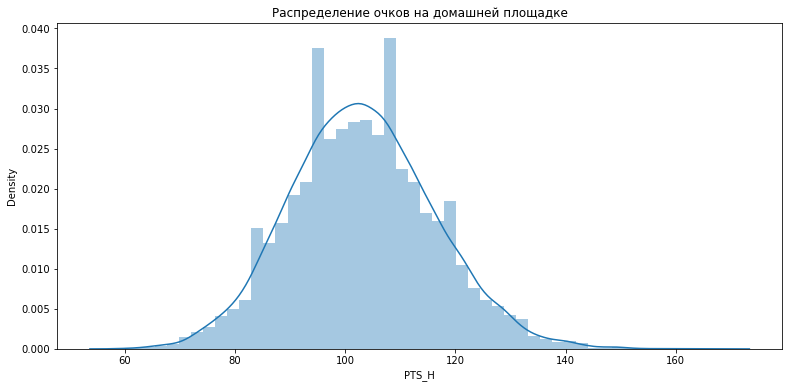

In [108]:
xh = sns.distplot(df_regul.PTS_H)
xh.set_title('Распределение очков на домашней площадке')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение очков на чужой площадке')

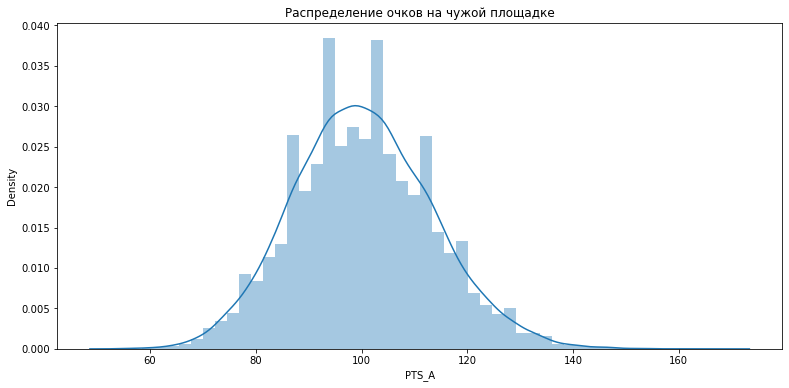

In [109]:
xa = sns.distplot(df_regul.PTS_A)
xa.set_title('Распределение очков на чужой площадке')

На двух графиках мы можем убедиться, что домашняя площадка действительно дает преимущество команде. А именно первый график "свдинут" левого и 100очков для домашней площадки чаще наблюдается при играх, в то время как на втором графике эти 100очков уже сдвинуты вправо.

посмотрим на сколько влияют защитные показатели на итоговую разницу в очках, создадим отдельный датафрем

In [110]:
df_defender = df_playoff['dif_score']

In [111]:
df_playoff.loc[:, 'dif_rebound'] = df_playoff.REB_H - df_playoff.REB_A
df_playoff

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,GAME_ID,seas,Date,team_H,team_A,PTS_H,PTS_A,dif_score,AST_H,AST_A,REB_H,REB_A,FG%_H,FG%_A,FG3%_H,FG3%_A,FT%_H,FT%_A,dif_rebound
0,42000102,2020,2021-05-26,PHI,WAS,120.0,95.0,25.0,26.0,22.0,45.0,40.0,0.557,0.402,0.429,0.091,0.684,0.633,5.0
1,42000132,2020,2021-05-26,NYK,ATL,101.0,92.0,9.0,15.0,17.0,54.0,41.0,0.383,0.369,0.364,0.273,0.739,0.818,13.0
2,42000142,2020,2021-05-26,UTA,MEM,141.0,129.0,12.0,28.0,20.0,42.0,33.0,0.544,0.541,0.487,0.348,0.774,0.763,9.0
3,42000112,2020,2021-05-25,BKN,BOS,130.0,108.0,22.0,31.0,23.0,46.0,43.0,0.523,0.424,0.447,0.353,0.955,0.783,3.0
4,42000152,2020,2021-05-25,PHX,LAL,102.0,109.0,-7.0,21.0,24.0,31.0,39.0,0.465,0.450,0.308,0.303,0.933,0.871,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23335,41400161,2014,2015-04-19,LAC,SAS,107.0,92.0,15.0,16.0,25.0,46.0,49.0,0.513,0.366,0.556,0.303,0.607,0.538,-3.0
23336,41400131,2014,2015-04-18,TOR,WAS,86.0,93.0,-7.0,21.0,22.0,48.0,61.0,0.380,0.394,0.207,0.286,0.714,0.600,-13.0
23337,41400141,2014,2015-04-18,GSW,NOP,106.0,99.0,7.0,24.0,24.0,47.0,44.0,0.457,0.422,0.379,0.409,0.618,0.800,3.0
23338,41400121,2014,2015-04-18,CHI,MIL,103.0,91.0,12.0,30.0,22.0,52.0,41.0,0.458,0.393,0.375,0.250,0.682,0.654,11.0


Text(0.5, 1.0, 'Зависимость разницы подборов на результирующую разницу очков')

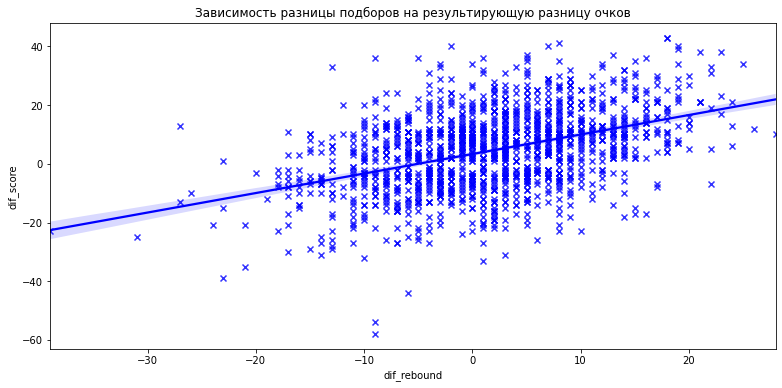

In [112]:
ax = sns.regplot(data=df_playoff, x='dif_rebound', y='dif_score', color='blue', marker='x')
ax.set_title('Зависимость разницы подборов на результирующую разницу очков')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0.5, 1.0, 'Зависимость разницы подборов на результирующую разницу очков')

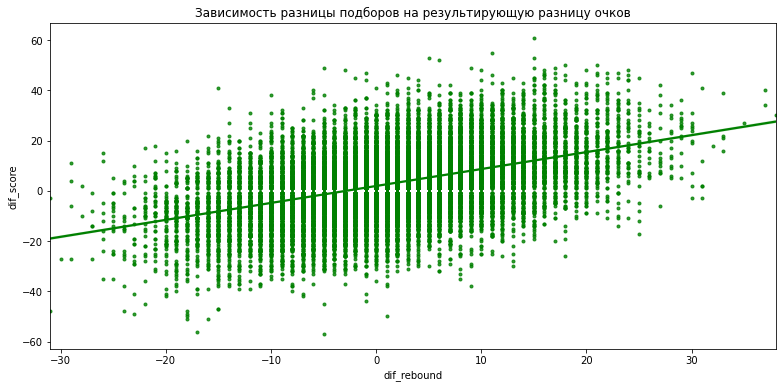

In [113]:
df_regul.loc[:, 'dif_rebound'] = df_regul.REB_H - df_regul.REB_A
ax = sns.regplot(data=df_regul, x='dif_rebound', y='dif_score', color='green', marker='.')
ax.set_title('Зависимость разницы подборов на результирующую разницу очков')

По двум графикам, видно что команды попавшие в playoff намного чаще отрабатывают в обороне, т.к. график регулярки распределен можно сказать по всему "окну", а график плейофф смещен  в сторону первую четверти. Сказать одназначно что если команда сделает больше подборов, то выиграет игру, в данном случае не предстваляется возможным. 

<AxesSubplot:xlabel='seas', ylabel='PTS_H'>

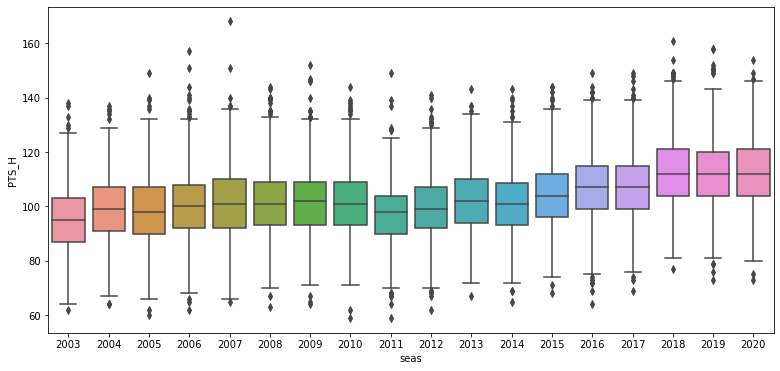

In [115]:
sns.boxplot(y='PTS_H', x='seas', data = df_regul)

Данный график показывает нам, что постепенно растет количесвто очков домашней команды

<AxesSubplot:xlabel='seas', ylabel='FG3%_H'>

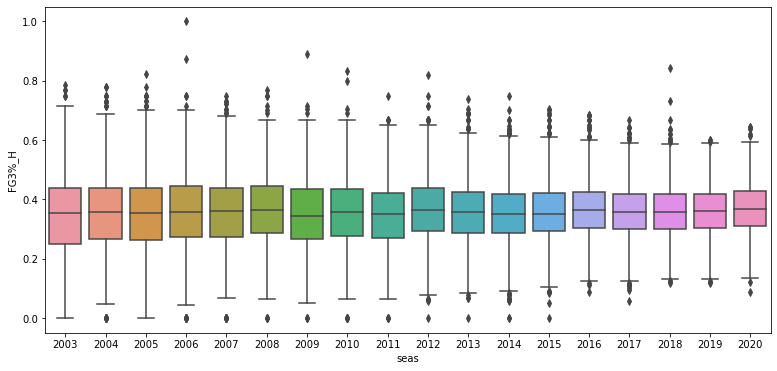

In [117]:
sns.boxplot(y='FG3%_H', x='seas', data = df_regul)

Часто распростаненное мнение, что кол-во трешек в баскете увеличивается, и игра становиться менее интересной, т.к. борьбы становиться меньше, но как видим медианное значение находиться примерное на одном уровне

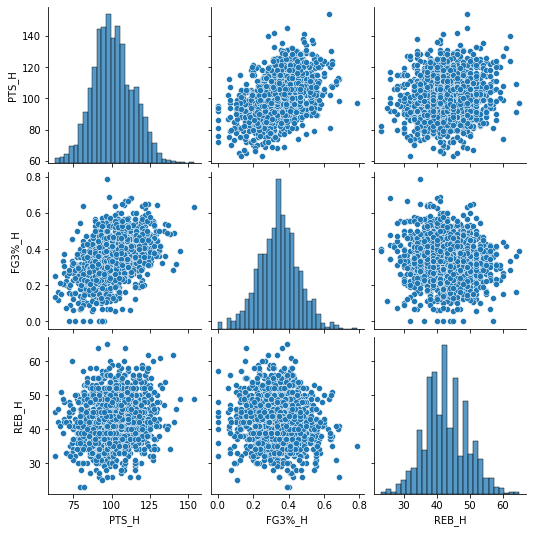

In [124]:
sns.pairplot(df_playoff[['PTS_H', 'FG3%_H', 'REB_H']])

На общем графике можно увидеть, что большинство ависимостей, прямопропорциональны, т.е. элипсоидное заполнение напрвленное из 4 четверти в 1ую, а вот зависимости подборов от процента трешек, видно, что элипс обратный, т.е. чем хуже процент реализации трешки, тем больше совершается подборов. Но т.к. график сделан относительно домашних команд, а сравнивать надо чужие трешки и домашние подборы, проверим это

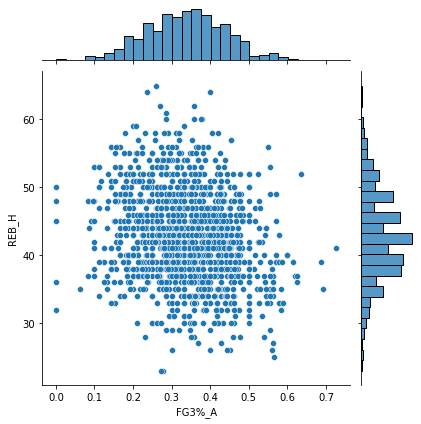

In [127]:
sns.jointplot(x='FG3%_A', y='REB_H', 
              data=df_playoff, kind='scatter')

Видно, что подозрение подтвердилось